In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# 1. Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values from 0-255 to 0.0-1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 479s 3us/step


In [3]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
# 2. Define the FNN Model Architecture
# --------------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 3. Compile the Model
# --------------------------------------------------------------
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
# 4. Train the Model
# --------------------------------------------------------------
print("--- Training the model ---")

H = model.fit(
    x_train,
    y_train,
    epochs=15,              # 15 epochs
    validation_data=(x_test, y_test),
    verbose=1
)

--- Training the model ---
Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2258 - loss: 2.0901 - val_accuracy: 0.3284 - val_loss: 1.8866
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3436 - loss: 1.8280 - val_accuracy: 0.3711 - val_loss: 1.7594
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3777 - loss: 1.7460 - val_accuracy: 0.4043 - val_loss: 1.6769
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4013 - loss: 1.6874 - val_accuracy: 0.4135 - val_loss: 1.6431
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4120 - loss: 1.6480 - val_accuracy: 0.4032 - val_loss: 1.6495
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4293 - loss: 1.6167 - val_accuracy: 0.4255 - val_loss: 1.6072
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4421 - loss: 1.5742 - val_accuracy: 0.3881 - val_loss: 1.7570
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accura

In [8]:
# 5. Evaluate the Model's Overall Accuracy
# --------------------------------------------------------------
print("\n--- Evaluating on test data ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nOverall Test accuracy: {test_acc*100:.2f}% (Note: Low accuracy is expected for an FNN on CIFAR-10)")



--- Evaluating on test data ---
313/313 - 0s - 1ms/step - accuracy: 0.4542 - loss: 1.5205

Overall Test accuracy: 45.42% (Note: Low accuracy is expected for an FNN on CIFAR-10)


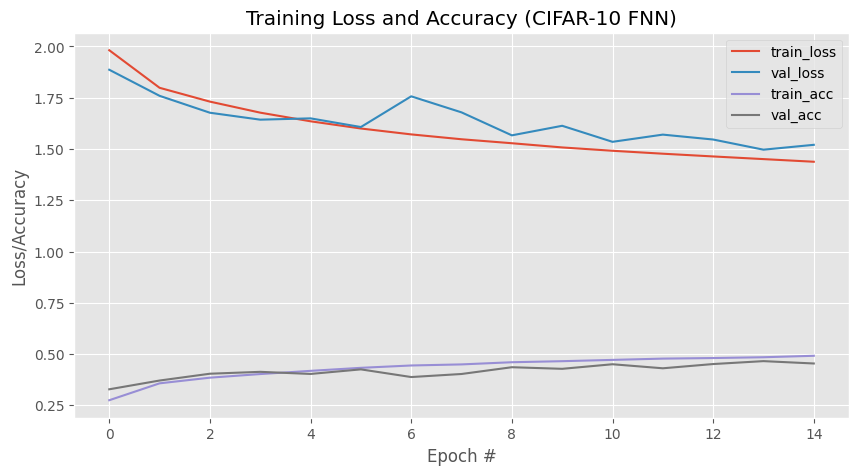

In [9]:
# 6. Plot Training Loss & Accuracy
# --------------------------------------------------------------
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))

epochs_range = np.arange(0, len(H.history["loss"]))

plt.plot(epochs_range, H.history["loss"], label="train_loss")
plt.plot(epochs_range, H.history["val_loss"], label="val_loss")
plt.plot(epochs_range, H.history["accuracy"], label="train_acc")
plt.plot(epochs_range, H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy (CIFAR-10 FNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



--- Displaying individual predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


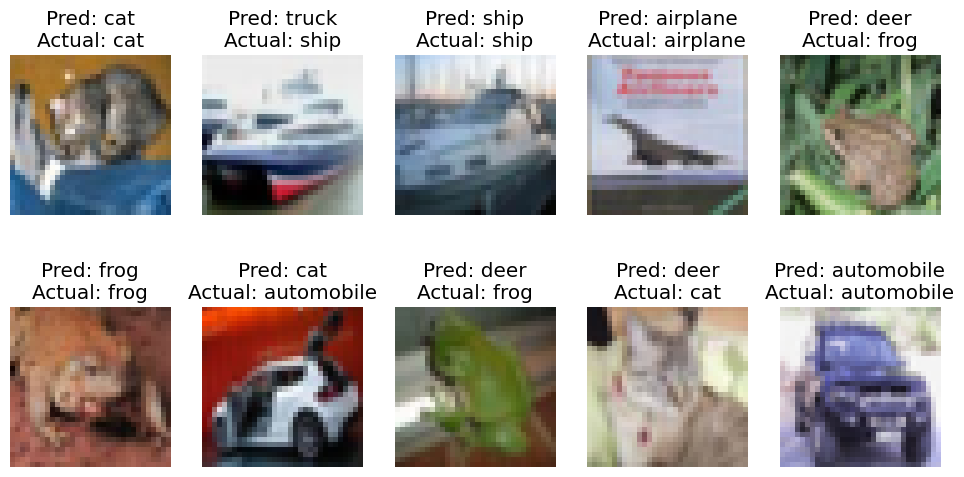

In [10]:
# 7. Display 10 Sample Predictions
# --------------------------------------------------------------
print("\n--- Displaying individual predictions ---")

predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = y_test[:10].flatten()

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    pred_name = class_names[predicted_labels[i]]
    actual_name = class_names[actual_labels[i]]
    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


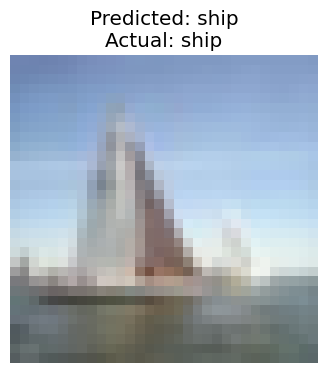

Actual Label: ship
Predicted Label: ship


In [16]:
# 8. Display ONE Random Prediction

import random

# Pick a random index from the test set
n = random.randint(0, x_test.shape[0] - 1)

# Get prediction for that one image
single_pred = model.predict(x_test[n].reshape(1, 32, 32, 3))
predicted_class = np.argmax(single_pred)

actual_class = y_test[n][0]

plt.figure(figsize=(4, 4))
plt.imshow(x_test[n])
plt.title(f"Predicted: {class_names[predicted_class]}\nActual: {class_names[actual_class]}")
plt.axis('off')
plt.show()

print("Actual Label:", class_names[actual_class])
print("Predicted Label:", class_names[predicted_class])
